In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [3]:
train_data.shape

(300000, 26)

In [4]:
test_data.shape

(200000, 25)

In [5]:
train_data.describe(include='all')

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,NaN,2,2,2,4,4,4,8,8,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A,A,A,C,B,B,A,E,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,281471,162678,276551,183752,297373,149208,292643,267631,121054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250018.576947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166


In [6]:
train_data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


## Checking column types

In [7]:
numerical_columns = train_data.select_dtypes(exclude='object')
numerical_columns

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
299996,499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
299997,499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558
299998,499998,0.599403,0.686054,0.660860,0.187199,0.758642,0.363130,0.324132,0.229017,0.220888,0.515304,0.389391,0.245234,0.303895,0.481138,8.272095


In [8]:
numerical_columns.shape

(300000, 16)

#### We have 14 numerical columns.
#### 'cont0', 'cont1', 'cont2', ..., 'cont13'

In [9]:
categorical_columns = train_data.select_dtypes(include='object')
categorical_columns

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,A,B,A,A,B,D,A,E,C,I
1,B,A,A,A,B,B,A,E,A,F
2,A,A,A,C,B,D,A,B,C,N
3,A,A,A,C,B,D,A,E,G,K
4,A,B,A,A,B,B,A,E,C,F
...,...,...,...,...,...,...,...,...,...,...
299995,A,B,A,C,B,B,A,E,E,L
299996,A,B,A,C,B,B,A,E,E,L
299997,A,B,A,C,B,B,A,E,C,M
299998,A,B,B,C,B,B,A,D,E,F


In [10]:
categorical_columns.shape

(300000, 10)

#### We have 10 categorical columns.
#### 'cat0', 'cat1', 'cat2', ..., 'cat9'

## Checking null/NaN values

### Train data

In [11]:
train_data.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

### Test data

In [12]:
test_data.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

## Dropping the ID column

In [13]:
train_data = train_data.drop(columns=['id'])

## Checking outliers

In [14]:
numerical_columns_target = numerical_columns['target'].copy()
numerical_columns.drop(columns=['id', 'target'], inplace=True)

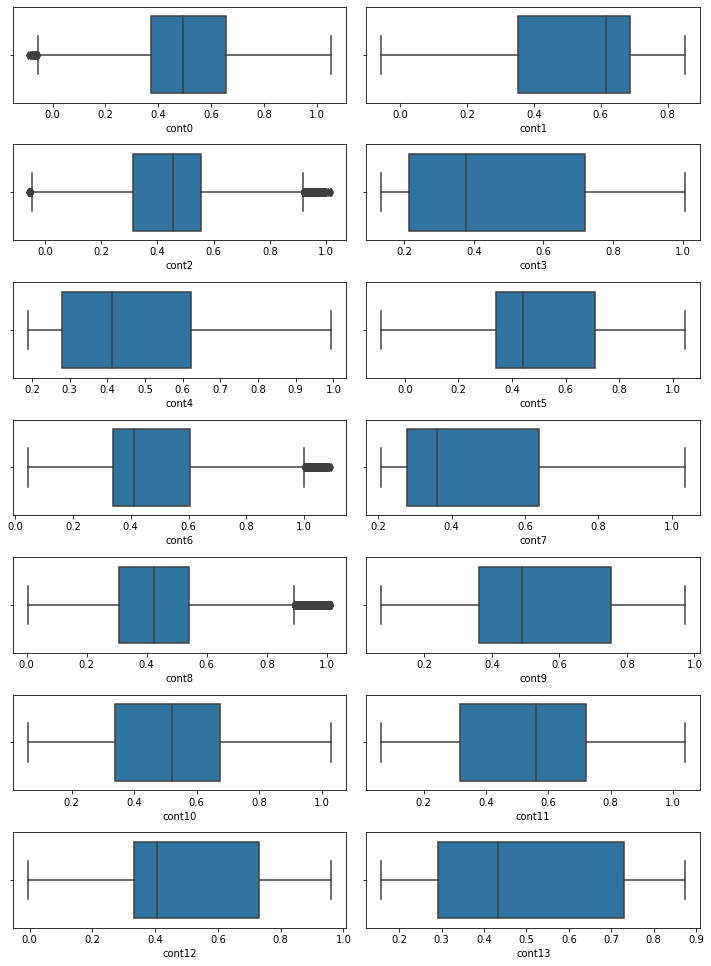

In [15]:
figure = plt.figure(figsize=(10, 15))
train_data_numerical = train_data[numerical_columns.columns]

for i in range(len(numerical_columns.columns)):
    figure.add_subplot(8, 2, i+1)
    sns.boxplot(train_data_numerical.iloc[:, i])

plt.tight_layout()
plt.show()

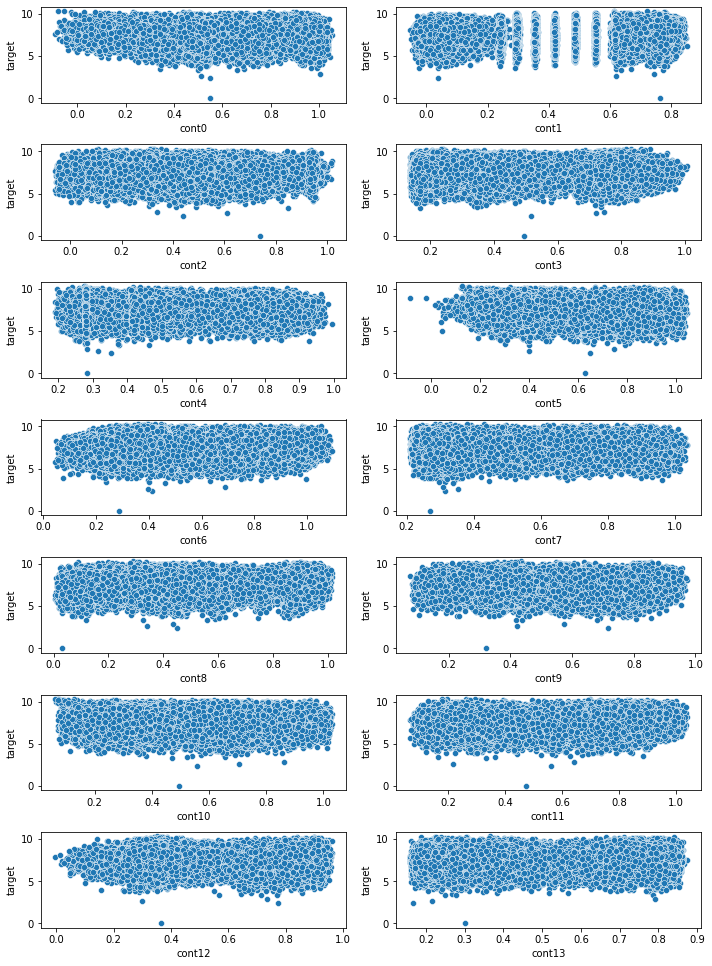

In [16]:
figure = plt.figure(figsize=(10, 15))
train_data_numerical = train_data[numerical_columns.columns]

for i in range(len(numerical_columns.columns)):
    figure.add_subplot(8, 2, i+1)
    sns.scatterplot(x=train_data_numerical.iloc[:, i], y=numerical_columns_target)

plt.tight_layout()
plt.show()

In [17]:
#removing outliers (when target=0)
train_data = train_data[train_data['target'] > 0]

In [18]:
train_data.shape

(299999, 25)

## Checking the categorical columns

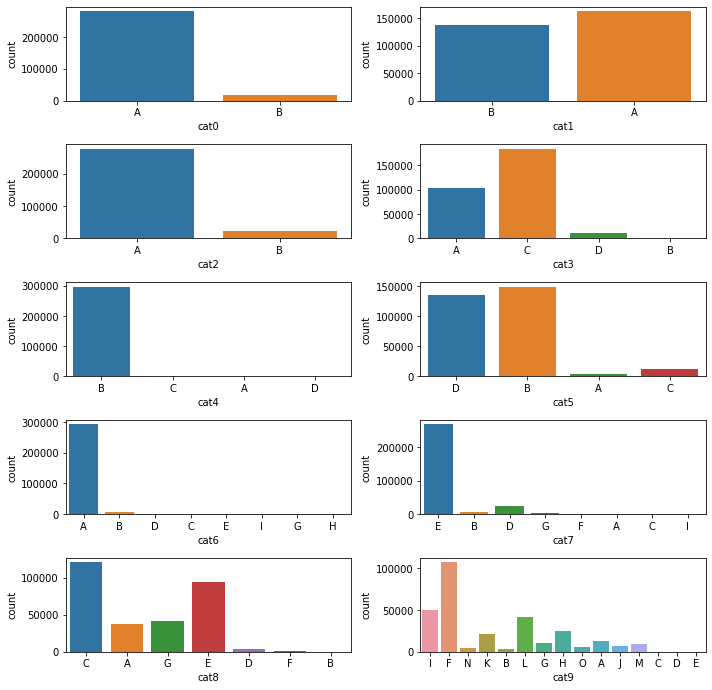

In [19]:
figure = plt.figure(figsize=(10, 15))
train_data_categorical = train_data[categorical_columns.columns]

for i in range(len(categorical_columns.columns)):
    figure.add_subplot(8, 2, i+1)
    sns.countplot(x=train_data_categorical.iloc[:, i])

plt.tight_layout()
plt.show()

## Transforming categorical columns to numerical

In [20]:
from sklearn.preprocessing import LabelEncoder

for i in range(len(categorical_columns.columns)):
    label_encoder = LabelEncoder()
    train_data_categorical[train_data_categorical.columns[i]] = label_encoder.fit_transform(train_data_categorical.iloc[:, i])

In [21]:
train_data_categorical.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0,1,0,0,1,3,0,4,2,8
1,1,0,0,0,1,1,0,4,0,5
2,0,0,0,2,1,3,0,1,2,13
3,0,0,0,2,1,3,0,4,6,10
4,0,1,0,0,1,1,0,4,2,5


In [22]:
#dropping original columns
train_data.drop(columns=train_data_categorical.columns, inplace=True)

In [23]:
train_data = pd.concat([train_data, train_data_categorical], axis=1)
train_data.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,...,0,1,0,0,1,3,0,4,2,8
1,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,...,1,0,0,0,1,1,0,4,0,5
2,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,...,0,0,0,2,1,3,0,1,2,13
3,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,...,0,0,0,2,1,3,0,4,6,10
4,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,...,0,1,0,0,1,1,0,4,2,5


In [24]:
#checking columns types
train_data.dtypes

cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
target    float64
cat0        int64
cat1        int64
cat2        int64
cat3        int64
cat4        int64
cat5        int64
cat6        int64
cat7        int64
cat8        int64
cat9        int64
dtype: object

## Checking distplot

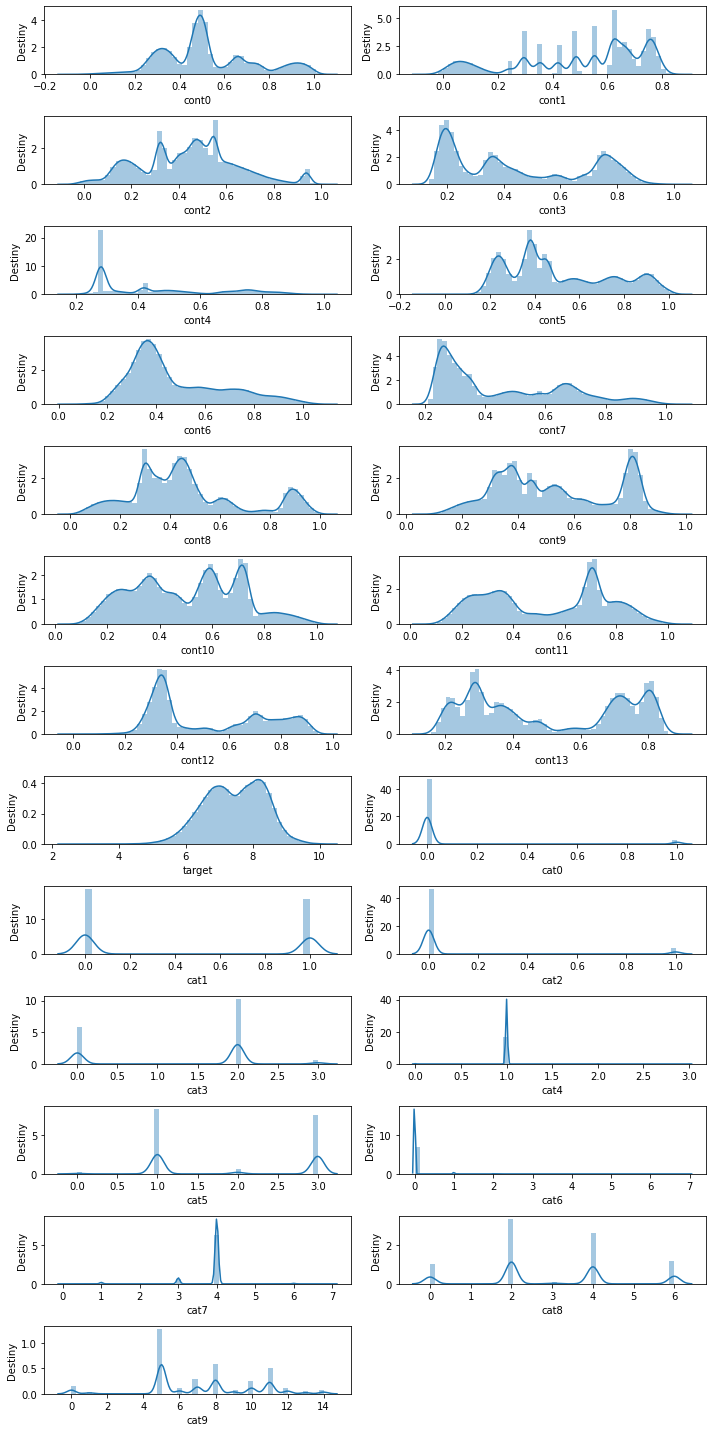

In [25]:
figure = plt.figure(figsize=(10, 20))

for i in range(len(train_data.columns)):
    figure.add_subplot(13, 2, i+1)
    ax = sns.distplot(x=train_data.iloc[:, i])
    ax.set(xlabel=train_data.columns[i], ylabel='Destiny')

plt.tight_layout()
plt.show()

## Checking correlation

<AxesSubplot:>

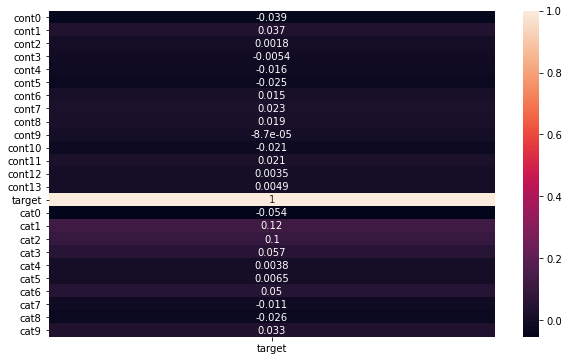

In [63]:
plt.figure(figsize=(10, 6))
corr = train_data.corr()
sns.heatmap(corr[['target']], annot=True)

## Models

In [26]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['target'])
y = train_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR

rf = RandomForestRegressor(random_state=19, n_jobs=-1)
lgb_model = lgb.LGBMRegressor(random_state=19, n_jobs=-1)
xgb_model = xgb.XGBRegressor(random_state=19, n_jobs=-1)
dt = DecisionTreeRegressor(random_state=19)
et = ExtraTreesRegressor(random_state=19, n_jobs=-1)
lr = LinearRegression()
l = Lasso(random_state=19)
en = ElasticNet(random_state=19)
sgd = SGDRegressor(random_state=19)
svr = SVR()

In [28]:
from sklearn.metrics import mean_squared_error

models = []
accuracies = []

### Random Forest

In [29]:
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('Random Forest')

### LGBM

In [30]:
lgb_model.fit(X_train, y_train)
predicted = lgb_model.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('LGBM')

### XGBoost

In [31]:
xgb_model.fit(X_train, y_train)
predicted = xgb_model.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('XGBoost')

### Decision Tree

In [32]:
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('Decision Tree')

### Extra Trees

In [33]:
et.fit(X_train, y_train)
predicted = et.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('Extra Trees')

### Linear Regression

In [34]:
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('Linear Regression')

### Lasso

In [35]:
l.fit(X_train, y_train)
predicted = l.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('Lasso')

### Elastic Net

In [36]:
en.fit(X_train, y_train)
predicted = en.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('Elastic Net')

### SGD

In [37]:
sgd.fit(X_train, y_train)
predicted = sgd.predict(X_test)
accuracies.append(np.sqrt(mean_squared_error(y_test, predicted)))
models.append('SGD')

## Pivot Table

In [38]:
pt = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

pivot_table = pd.pivot_table(pt, index='Model')
pivot_table

,Accuracy
Model,
Decision Tree,1.229042
Elastic Net,0.887738
Extra Trees,0.862680
LGBM,0.847045
Lasso,0.887738
Linear Regression,0.869896
Random Forest,0.859636
SGD,0.871895
XGBoost,0.849902


## Tunning LightGBM hyperparameters using Optuna

In [39]:
import optuna
from sklearn.model_selection import KFold

def objective(trial):
    
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 19
    }
    
    fold = KFold(n_splits=7, shuffle=True, random_state=19)
    scores = []
    
    for train_index, test_index in fold.split(X):
        
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
    
        dtrain = lgb.Dataset(X_train, label=y_train)
    
        gbm = lgb.train(params, dtrain)
        predicted = gbm.predict(X_test)
        scores.append(np.sqrt(mean_squared_error(y_test, predicted)))
        
    return np.mean(scores) 

In [40]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-02-07 11:08:03,046] A new study created in memory with name: no-name-7c47d94a-a6b2-4c00-a0fd-036c48d0cfc0
[I 2021-02-07 11:08:48,121] Trial 0 finished with value: 0.8481278061426328 and parameters: {'lambda_l1': 0.014048980824402795, 'lambda_l2': 5.421271442349899e-07, 'num_leaves': 186, 'feature_fraction': 0.9397179185147705, 'bagging_fraction': 0.6987390324337059, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 0 with value: 0.8481278061426328.
[I 2021-02-07 11:09:20,027] Trial 1 finished with value: 0.8464230001316613 and parameters: {'lambda_l1': 0.7997192127880542, 'lambda_l2': 3.437674760187728e-08, 'num_leaves': 162, 'feature_fraction': 0.5187474301173581, 'bagging_fraction': 0.49139733959386855, 'bagging_freq': 6, 'min_child_samples': 97}. Best is trial 1 with value: 0.8464230001316613.
[I 2021-02-07 11:10:04,537] Trial 2 finished with value: 0.847383823880193 and parameters: {'lambda_l1': 1.2943812486176856e-07, 'lambda_l2': 0.40998372645419334, 'num_leaves':

[I 2021-02-07 11:20:31,265] Trial 22 finished with value: 0.8453875661860449 and parameters: {'lambda_l1': 0.19818716768169414, 'lambda_l2': 1.9802454617059622, 'num_leaves': 138, 'feature_fraction': 0.4159652683755884, 'bagging_fraction': 0.8478054199927596, 'bagging_freq': 2, 'min_child_samples': 6}. Best is trial 8 with value: 0.8449744872056836.
[I 2021-02-07 11:21:13,472] Trial 23 finished with value: 0.8453148032609069 and parameters: {'lambda_l1': 0.013235587584064195, 'lambda_l2': 0.09932975933437017, 'num_leaves': 109, 'feature_fraction': 0.5753413911953374, 'bagging_fraction': 0.9997247400240558, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 8 with value: 0.8449744872056836.
[I 2021-02-07 11:21:38,208] Trial 24 finished with value: 0.8449594764438623 and parameters: {'lambda_l1': 0.00017060741516855495, 'lambda_l2': 1.0295447772632989e-08, 'num_leaves': 82, 'feature_fraction': 0.4016478076603823, 'bagging_fraction': 0.9148777036989055, 'bagging_freq': 1, 'min_chi

[I 2021-02-07 11:32:21,402] Trial 45 finished with value: 0.8447701007872875 and parameters: {'lambda_l1': 7.772156938148078e-07, 'lambda_l2': 6.3108578990715775e-06, 'num_leaves': 80, 'feature_fraction': 0.4647950345840379, 'bagging_fraction': 0.800824994813518, 'bagging_freq': 1, 'min_child_samples': 76}. Best is trial 45 with value: 0.8447701007872875.
[I 2021-02-07 11:32:45,733] Trial 46 finished with value: 0.8448446647397739 and parameters: {'lambda_l1': 8.971628761468759e-07, 'lambda_l2': 4.9673413112146275e-06, 'num_leaves': 82, 'feature_fraction': 0.4293875147423979, 'bagging_fraction': 0.712558312149566, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 45 with value: 0.8447701007872875.
[I 2021-02-07 11:33:13,086] Trial 47 finished with value: 0.845220105951526 and parameters: {'lambda_l1': 9.791925965609045e-07, 'lambda_l2': 4.635314157633801e-06, 'num_leaves': 120, 'feature_fraction': 0.42984675516667414, 'bagging_fraction': 0.7165942516998527, 'bagging_freq': 1, 

[I 2021-02-07 11:42:38,938] Trial 68 finished with value: 0.8454662205120973 and parameters: {'lambda_l1': 1.4635921365582923e-07, 'lambda_l2': 6.886690197486781e-08, 'num_leaves': 36, 'feature_fraction': 0.4438157757975234, 'bagging_fraction': 0.8218487192501005, 'bagging_freq': 2, 'min_child_samples': 92}. Best is trial 57 with value: 0.8446793882431637.
[I 2021-02-07 11:43:01,891] Trial 69 finished with value: 0.844838878545732 and parameters: {'lambda_l1': 1.0189233054423947e-08, 'lambda_l2': 8.35901364203773e-06, 'num_leaves': 65, 'feature_fraction': 0.41518551620755173, 'bagging_fraction': 0.833841146718228, 'bagging_freq': 1, 'min_child_samples': 100}. Best is trial 57 with value: 0.8446793882431637.
[I 2021-02-07 11:43:36,849] Trial 70 finished with value: 0.8450691159559334 and parameters: {'lambda_l1': 2.267160913912507e-08, 'lambda_l2': 4.649955923138047e-07, 'num_leaves': 89, 'feature_fraction': 0.4897616667513156, 'bagging_fraction': 0.7994080095664181, 'bagging_freq': 2, 

[I 2021-02-07 11:53:38,304] Trial 91 finished with value: 0.844772933333466 and parameters: {'lambda_l1': 5.1511512640301733e-08, 'lambda_l2': 9.055925514118271e-06, 'num_leaves': 74, 'feature_fraction': 0.4181480624804646, 'bagging_fraction': 0.8360239531118093, 'bagging_freq': 1, 'min_child_samples': 97}. Best is trial 57 with value: 0.8446793882431637.
[I 2021-02-07 11:54:03,116] Trial 92 finished with value: 0.8448169351075089 and parameters: {'lambda_l1': 5.150491970662148e-08, 'lambda_l2': 8.08329159238096e-06, 'num_leaves': 73, 'feature_fraction': 0.42815471284562473, 'bagging_fraction': 0.8440346343741779, 'bagging_freq': 1, 'min_child_samples': 95}. Best is trial 57 with value: 0.8446793882431637.
[I 2021-02-07 11:54:27,511] Trial 93 finished with value: 0.8446782771517792 and parameters: {'lambda_l1': 5.231399442791927e-08, 'lambda_l2': 9.641225535858149e-06, 'num_leaves': 73, 'feature_fraction': 0.43442171838042865, 'bagging_fraction': 0.8506937910720961, 'bagging_freq': 1, 

In [42]:
study.best_trial.value

0.8446782771517792

In [43]:
study.best_params

{'lambda_l1': 5.231399442791927e-08,
 'lambda_l2': 9.641225535858149e-06,
 'num_leaves': 73,
 'feature_fraction': 0.43442171838042865,
 'bagging_fraction': 0.8506937910720961,
 'bagging_freq': 1,
 'min_child_samples': 96}

In [44]:
lgb_optuna = lgb.LGBMRegressor(**study.best_params)

lgb_optuna.fit(X_train, y_train)
predicted = lgb_optuna.predict(X_test)
np.sqrt(mean_squared_error(y_test, predicted))

[LightGBM] [Warning] lambda_l1 is set=5.231399442791927e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.231399442791927e-08
[LightGBM] [Warning] feature_fraction is set=0.43442171838042865, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43442171838042865
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=9.641225535858149e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.641225535858149e-06
[LightGBM] [Warning] bagging_fraction is set=0.8506937910720961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8506937910720961


0.8459370776609826

## Tunning XGBoost hyperparameters using Optuna

In [45]:
import optuna

def objective(trial):
    
    param = {
        "verbosity": 0,
        "objective": "reg:linear",
        "metrics": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "random_state": 19
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
        
    fold = KFold(n_splits=7, shuffle=True, random_state=19)
    scores = []
    
    for train_index, test_index in fold.split(X):
        
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)

        xg = xgb.train(param, dtrain)
        predicted = xg.predict(dtest)
        scores.append(np.sqrt(mean_squared_error(y_test, predicted)))
    
    return np.mean(scores) 

In [46]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-02-07 11:58:20,936] A new study created in memory with name: no-name-3d678e69-865c-4137-85aa-2c9487aca87a
[I 2021-02-07 11:59:21,038] Trial 0 finished with value: 7.012612610152581 and parameters: {'booster': 'gbtree', 'lambda': 0.0046376656364507315, 'alpha': 2.4720483026743444e-07, 'max_depth': 7, 'eta': 2.757093759487267e-07, 'gamma': 0.007197628824187853, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 7.012612610152581.
[I 2021-02-07 12:00:36,914] Trial 1 finished with value: 7.009604982662419 and parameters: {'booster': 'dart', 'lambda': 0.0037327912200366643, 'alpha': 2.69416489595147e-08, 'max_depth': 9, 'eta': 4.383460637362923e-05, 'gamma': 6.262989224063705e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.1191563412536642e-08, 'skip_drop': 1.7349429069582184e-07}. Best is trial 1 with value: 7.009604982662419.
[I 2021-02-07 12:01:11,162] Trial 2 finished with value: 7.012598136464503 and parameters: {'boost

[I 2021-02-07 12:06:51,275] Trial 25 finished with value: 0.8590775357441992 and parameters: {'booster': 'dart', 'lambda': 2.3066688390826768e-06, 'alpha': 2.086540335750118e-07, 'max_depth': 2, 'eta': 0.8693061289509141, 'gamma': 0.10449586446336867, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.003901644969936413, 'skip_drop': 1.5422255074886143e-06}. Best is trial 25 with value: 0.8590775357441992.
[I 2021-02-07 12:07:17,917] Trial 26 finished with value: 6.413656436328756 and parameters: {'booster': 'dart', 'lambda': 2.4528856519932787e-06, 'alpha': 1.1876626671847344e-07, 'max_depth': 3, 'eta': 0.009041866053464227, 'gamma': 0.03227519285358584, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0012972546648832514, 'skip_drop': 3.5517272079488344e-06}. Best is trial 25 with value: 0.8590775357441992.
[I 2021-02-07 12:07:37,055] Trial 27 finished with value: 0.8590465719331227 and para

[I 2021-02-07 12:14:48,905] Trial 43 finished with value: 1.2715521073750826 and parameters: {'booster': 'dart', 'lambda': 5.498571878081145e-06, 'alpha': 4.0936838827184975e-06, 'max_depth': 3, 'eta': 0.18240594673457305, 'gamma': 0.20994807193564582, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00024921164379777767, 'skip_drop': 1.663447419103801e-05}. Best is trial 36 with value: 0.8563677572158357.
[I 2021-02-07 12:15:23,975] Trial 44 finished with value: 0.8551926973735299 and parameters: {'booster': 'dart', 'lambda': 1.0752874212573438e-06, 'alpha': 5.4379110801880714e-05, 'max_depth': 4, 'eta': 0.7060842932279434, 'gamma': 0.005148105189674023, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.03432344619380705, 'skip_drop': 0.00021151077856169478}. Best is trial 44 with value: 0.8551926973735299.
[I 2021-02-07 12:15:57,778] Trial 45 finished with value: 1.2723883476516527 and para

[I 2021-02-07 12:27:27,517] Trial 63 finished with value: 2.9648343950081752 and parameters: {'booster': 'dart', 'lambda': 4.002918771840599e-07, 'alpha': 2.2452791866777914e-05, 'max_depth': 5, 'eta': 0.0872753911444142, 'gamma': 0.06722790646748278, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.04331772868773965, 'skip_drop': 5.6249604688597264e-08}. Best is trial 52 with value: 0.8551334439062559.
[I 2021-02-07 12:28:01,907] Trial 64 finished with value: 0.8784474213961557 and parameters: {'booster': 'dart', 'lambda': 9.254360260937429e-07, 'alpha': 0.0011016593368610127, 'max_depth': 4, 'eta': 0.3941439965874424, 'gamma': 0.004522279642732777, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.19967781783744373, 'skip_drop': 1.3549877369257555e-05}. Best is trial 52 with value: 0.8551334439062559.
[I 2021-02-07 12:28:29,241] Trial 65 finished with value: 0.8572533885966386 and parameters: {

[I 2021-02-07 12:38:08,154] Trial 81 finished with value: 0.8547827497430479 and parameters: {'booster': 'dart', 'lambda': 7.528312492144163e-05, 'alpha': 6.34072018217563e-05, 'max_depth': 4, 'eta': 0.6208614552634966, 'gamma': 0.04401437353092871, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.5582566474505586e-08, 'skip_drop': 0.0013142693980661012}. Best is trial 81 with value: 0.8547827497430479.
[I 2021-02-07 12:38:43,159] Trial 82 finished with value: 0.8551306185670882 and parameters: {'booster': 'dart', 'lambda': 0.00016903294030347574, 'alpha': 0.0001299995764445981, 'max_depth': 4, 'eta': 0.6126352203914388, 'gamma': 0.0410433870342377, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0054667978154549915, 'skip_drop': 0.0012193279717701534}. Best is trial 81 with value: 0.8547827497430479.
[I 2021-02-07 12:39:18,391] Trial 83 finished with value: 0.8551426977817488 and parameters: {

In [47]:
study.best_trial.value

0.8538279370364947

In [48]:
study.best_params

{'booster': 'dart',
 'lambda': 0.00026024064240187384,
 'alpha': 0.0005381258911006855,
 'max_depth': 5,
 'eta': 0.6474155689533981,
 'gamma': 0.012255971392428388,
 'grow_policy': 'lossguide',
 'sample_type': 'uniform',
 'normalize_type': 'tree',
 'rate_drop': 0.0062298139748234675,
 'skip_drop': 0.02853296596850128}

In [49]:
xgb_optuna = xgb.XGBRegressor(**study.best_params)

xgb_optuna.fit(X_train, y_train)
predicted = xgb_optuna.predict(X_test)
np.sqrt(mean_squared_error(y_test, predicted))

0.854695086545604

## Submission

In [57]:
test_data_categorical = test_data.select_dtypes(include='object')

for i in range(len(test_data_categorical.columns)):
    label_encoder = LabelEncoder()
    test_data_categorical[test_data_categorical.columns[i]] = label_encoder.fit_transform(test_data_categorical.iloc[:, i])

In [58]:
test_data.drop(columns=test_data_categorical.columns, inplace=True)

In [59]:
test_data = pd.concat([test_data, test_data_categorical], axis=1)

In [60]:
prediction = lgb_optuna.predict(test_data.drop(columns=['id']))

submission = pd.DataFrame({
    'id': test_data['id'],
    'target': prediction
})

submission.to_csv('submission_tabular.csv', index=False)